In [1]:
import pandas as pd

In [2]:
import numpy as np

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import pandas as pd
import os

inputDataset = pd.read_csv("/Users/bhaghyalakshmi/Desktop/bank/bank.csv", delimiter=";")


In [31]:
inputDataset.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [32]:
inputDataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [33]:
inputDataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [34]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [35]:
import seaborn as sns

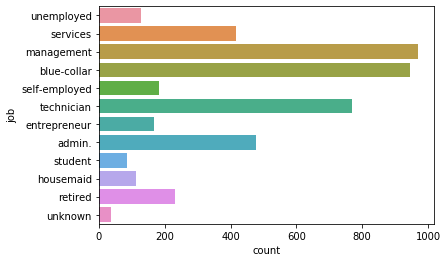

In [36]:
sns.countplot(y='job',data=inputDataset)

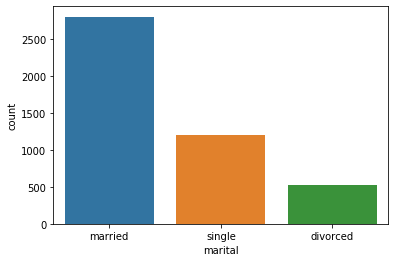

In [37]:
sns.countplot(x='marital',data=inputDataset)

In [38]:
inputDataset.education.value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

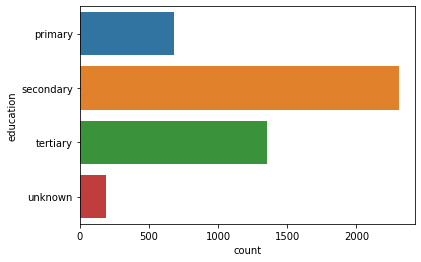

In [39]:
sns.countplot(y='education',data=inputDataset)

In [40]:
from sklearn import preprocessing

In [41]:
le = preprocessing.LabelEncoder

In [42]:
inputDataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [62]:
#job	marital	education	default-housing	loan	contact month campaign	pdays	previous	previous
le = preprocessing.LabelEncoder()
inputDataset.job=le.fit_transform(inputDataset.job)
inputDataset.marital=le.fit_transform(inputDataset.marital)
inputDataset.education=le.fit_transform(inputDataset.education)
inputDataset.default=le.fit_transform(inputDataset.default)
inputDataset.housing=le.fit_transform(inputDataset.housing)
inputDataset.loan=le.fit_transform(inputDataset.loan)
inputDataset.contact=le.fit_transform(inputDataset.contact)
inputDataset.month=le.fit_transform(inputDataset.month)
inputDataset.campaign=le.fit_transform(inputDataset.campaign)
inputDataset.pdays=le.fit_transform(inputDataset.pdays)
inputDataset.previous=le.fit_transform(inputDataset.previous)
inputDataset.poutcome=le.fit_transform(inputDataset.poutcome)
inputDataset.y=le.fit_transform(inputDataset.y)

In [63]:
inputDataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,0,0,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,0,228,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,0,219,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,3,0,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,0,0,0,3,0


In [64]:
X  = inputDataset.iloc[:,0:16]
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10,1,0,0,1787,0,0,0,19,10,79,0,0,0,3
1,33,7,1,1,0,4789,1,1,0,11,8,220,0,228,4,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,0,219,1,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,3,0,0,3
4,59,1,1,1,0,0,1,0,2,5,8,226,0,0,0,3


In [65]:
Y  = inputDataset.iloc[:,16]
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
modelLogistic = LogisticRegression()
modelLogistic.fit(X_train,Y_train)

In [69]:

# create model
model = Sequential()
model.add(Dense(12, input_dim=16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [71]:
model

In [72]:
from sklearn import model_selection

In [73]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.2,random_state=0)

In [74]:
X_train.shape,Y_train.shape

((3616, 16), (3616,))

In [75]:
X_test.shape,X_test.shape

((905, 16), (905, 16))

In [105]:
modelLogistic.fit(X_train,Y_train)
predictionYTest= modelLogistic.predict(X_test)
from sklearn.metrics import confusion_matrix

/Users/bhaghyalakshmi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [106]:
import numpy as np
xTrainForSequencialModel = np.array(X_train)
yTrainForSequencialModel = np.array(Y_train)

In [107]:
yTrainForSequencialModel =yTrainForSequencialModel.reshape(yTrainForSequencialModel.shape[0],1)

In [108]:
model.fit(np.array(xTrainForSequencialModel),np.array(yTrainForSequencialModel),epochs=10,batch_size=128,shuffle=True)

Epoch 1/10
3616/3616 [==============================] - 0s 18us/step - loss: 0.5427 - accuracy: 0.8587
Epoch 2/10
3616/3616 [==============================] - 0s 18us/step - loss: 0.6131 - accuracy: 0.8532
Epoch 3/10
3616/3616 [==============================] - 0s 17us/step - loss: 0.7369 - accuracy: 0.8587
Epoch 4/10
3616/3616 [==============================] - 0s 17us/step - loss: 0.5449 - accuracy: 0.8559
Epoch 5/10
3616/3616 [==============================] - 0s 20us/step - loss: 0.4931 - accuracy: 0.8645
Epoch 6/10
3616/3616 [==============================] - 0s 18us/step - loss: 0.6225 - accuracy: 0.8590
Epoch 7/10
3616/3616 [==============================] - 0s 17us/step - loss: 0.6838 - accuracy: 0.8581
Epoch 8/10
3616/3616 [==============================] - 0s 19us/step - loss: 0.5402 - accuracy: 0.8664
Epoch 9/10
3616/3616 [==============================] - 0s 16us/step - loss: 0.5243 - accuracy: 0.8617
Epoch 10/10
3616/3616 [==============================] - 0s 17us/step - l

In [109]:
scores = model.evaluate(np.array(X_test),np.array(Y_test))

905/905 [==============================] - 0s 26us/step


In [110]:
print("\n%s: %.2f%%"%(model.metrics_names[1],scores[1]*100))


accuracy: 86.63%


In [111]:
confusion_matrix = confusion_matrix(Y_test,predictionYTest)

In [113]:
print(confusion_matrix)

[[768  25]
 [ 84  28]]
